In [1]:
import geopandas as gpd
import pandas as pd
import xlrd
from datetime import datetime
import matplotlib.pyplot as plt


#los datos de temperatura se sacaron de  =
# https://www.datos.gov.co/Ambiente-y-Desarrollo-Sostenible/Datos-Hidrometeorol-gicos-Crudos-Red-de-Estaciones/sbwg-7ju4/explore/query/SELECT%0A%20%20%60codigoestacion%60%2C%0A%20%20%60codigosensor%60%2C%0A%20%20%60fechaobservacion%60%2C%0A%20%20%60valorobservado%60%2C%0A%20%20%60nombreestacion%60%2C%0A%20%20%60departamento%60%2C%0A%20%20%60municipio%60%2C%0A%20%20%60zonahidrografica%60%2C%0A%20%20%60latitud%60%2C%0A%20%20%60longitud%60%2C%0A%20%20%60descripcionsensor%60%2C%0A%20%20%60unidadmedida%60%0AWHERE%0A%20%20%60fechaobservacion%60%0A%20%20%20%20BETWEEN%20%222023-01-01T15%3A38%3A01%22%20%3A%3A%20floating_timestamp%0A%20%20%20%20AND%20%222023-02-01T15%3A38%3A01%22%20%3A%3A%20floating_timestamp/page/filter

EPSG:4326


,ubicaci_n_state,codigo,estado,ubicaci_n_city,municipio,categoria,fecha_suspension,nombre,altitud,corriente,ubicaci_n_address,fecha_instalacion,departamento,ubicaci_n_zip,geometry
0,NaN,52057100,Activa,NaN,Ipiales,Limnigráfica,NaT,RUMICHACA - AUT [52057100],2582,Guaitara,NaN,2016-11-15,Nariño,NaN,POINT (-77.66198 0.81379)
1,NaN,52055170,Activa,NaN,Contadero,Climática Principal,NaT,LA JOSEFINA - AUT [52055170],2450,Guaitara,NaN,2005-12-10,Nariño,NaN,POINT (-77.49119 0.93031)
2,NaN,52055220,Activa,NaN,Túquerres,Climática Principal,NaT,EL PARAISO - AUT [52055220],3120,Guaitara,NaN,2004-03-01,Nariño,NaN,POINT (-77.63689 1.07061)
3,NaN,44015070,Activa,NaN,Mocoa,Climática Principal,NaT,EL PEPINO - AUT [44015070],760,Guaitara,NaN,2005-11-11,Putumayo,NaN,POINT (-76.66711 1.08289)
4,NaN,48015040,Activa,NaN,Puerto Nariño,Climática Principal,NaT,PUERTO NARINO - AUT [48015040],158,Amazonas,NaN,2005-07-19,Amazonas,NaN,POINT (-70.36264 -3.78031)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,23070020,Activa,NaN,Sonsón,Pluviográfica,NaT,RIO CLARO [23070020],449,Atrato,NaN,2009-09-01,Antioquia,NaN,POINT (-74.84836 5.85553)
996,NaN,24030160,Activa,NaN,Tasco,Pluviométrica,NaT,TASCO [24030160],2486,Orinoco,NaN,1957-10-15,Boyacá,NaN,POINT (-72.78479 5.86036)
997,NaN,23070010,Activa,NaN,Sonsón,Pluviométrica,NaT,CLARO DE LUNA [23070010],3347,Orinoco,NaN,1987-04-15,Antioquia,NaN,POINT (-74.76203 5.86142)
998,NaN,23105020,Suspendida,NaN,Yondó (Casabe),Climática Principal,1992-08-15,AMPARO EL [23105020],150,Regla,NaN,1984-09-15,Antioquia,NaN,POINT (-74.40000 6.73333)


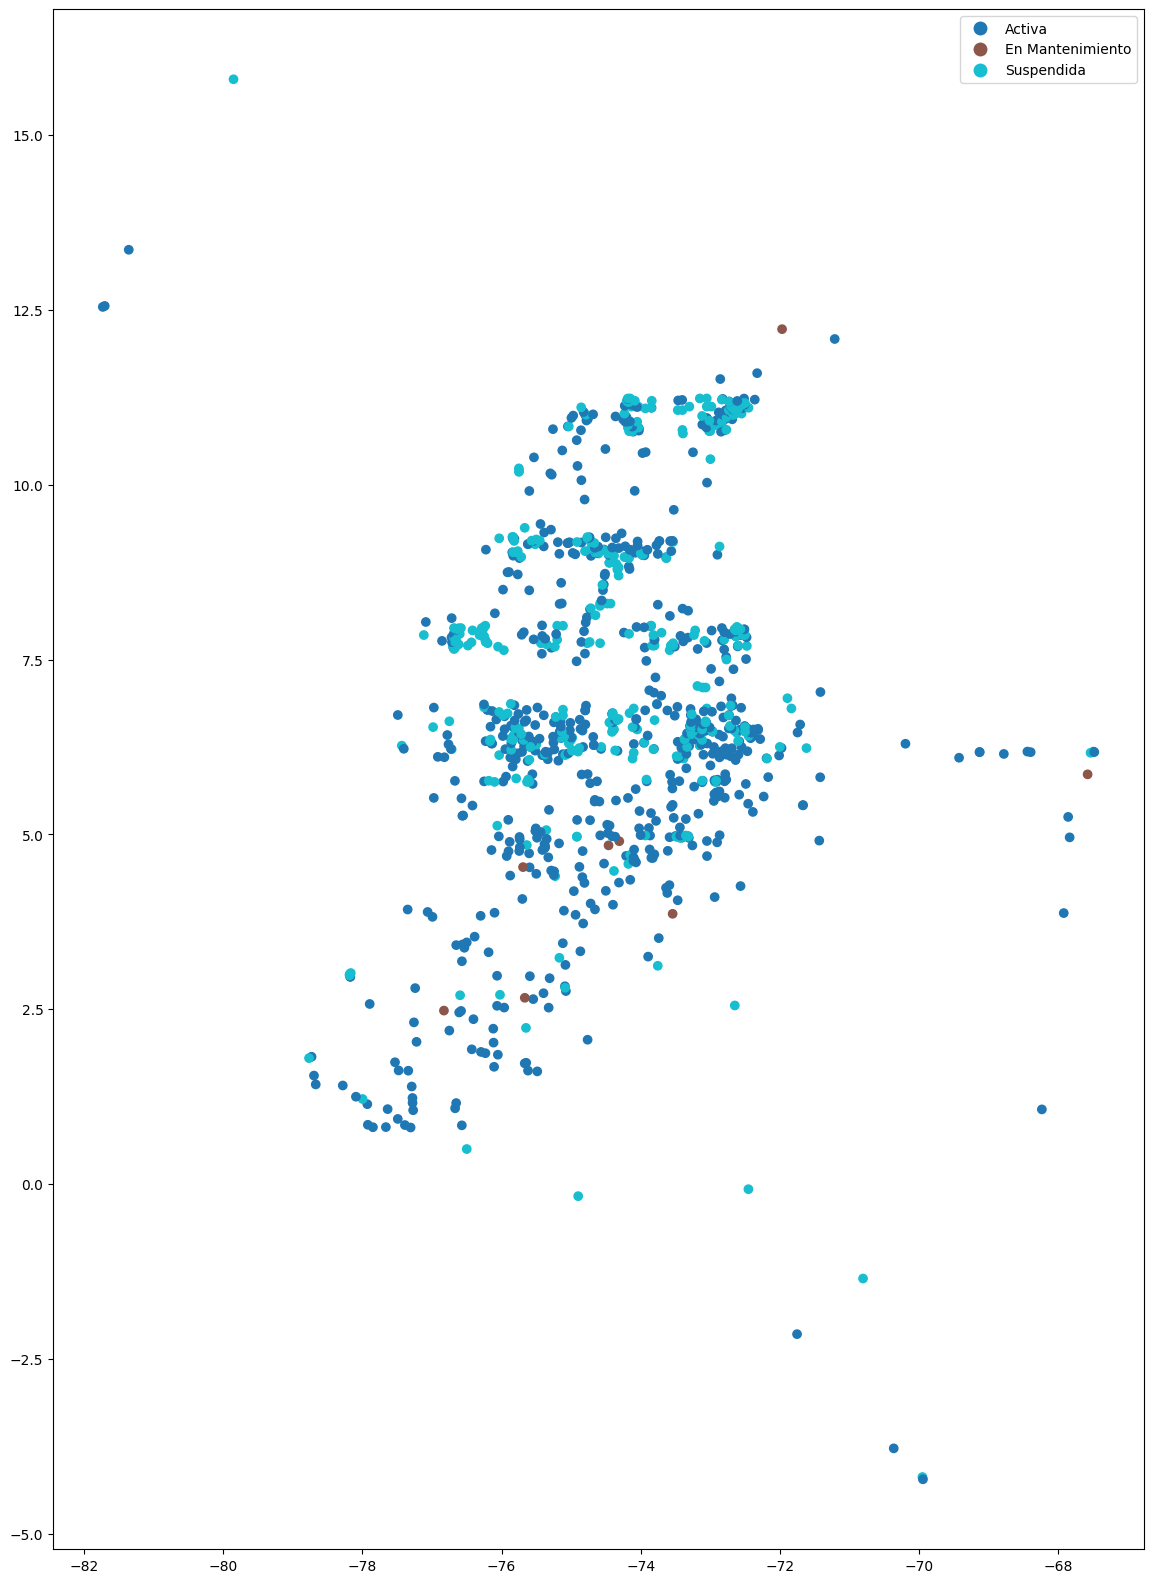

In [2]:
estaciones = gpd.read_file('https://www.datos.gov.co/resource/n6vw-vkfe.geojson') #ubicacion de estaciones
estaciones.plot('estado', legend ='True' ,  figsize = [20,20] )
print(estaciones.crs)
estaciones


,DeCodigo,DeNombre,DeArea,DeNorma,Shape_Leng,Shape_Area,geometry
0,00,Area en Litigio Cauca - Huila,342.099087,Límite por Acuerdo Gobernadores Informe 1982,1.093000e+05,3.420991e+08,"POLYGON ((4628086.407 1824018.057, 4628427.450..."
1,05,Antioquia,62786.020507,Constitución Política de Colombia 1886,2.356259e+06,6.278602e+10,"POLYGON ((4624482.375 2526319.238, 4624578.119..."
2,08,Atlántico,3313.384461,Ley No. 21 de 1910,2.792774e+05,3.313384e+09,"POLYGON ((4798072.649 2784977.412, 4798080.944..."
3,13,Bolívar,26662.776537,Constitución Política de Colombia 1886,1.651842e+06,2.666278e+10,"POLYGON ((4753469.562 2752302.933, 4753478.480..."
4,15,Boyacá,23078.339852,Constitución Política de Colombia 1886,1.759339e+06,2.307834e+10,"POLYGON ((5091224.442 2337434.687, 5091324.646..."
5,17,Caldas,7422.208349,Ley No.17 de 1905,7.359800e+05,7.422208e+09,"POLYGON ((4813988.018 2196861.468, 4814065.960..."
6,18,Caquetá,92709.074843,Constitución Política de Colombia 1991,2.352158e+06,9.270907e+10,"POLYGON ((4800106.596 1882811.417, 4800522.264..."
7,19,Cauca,30918.668571,Constitución Política de Colombia 1886,1.551194e+06,3.091867e+10,"POLYGON ((4615640.633 1926504.775, 4615689.855..."
8,20,Cesar,22531.042390,Ley No. 25 de 1967,1.388038e+06,2.253104e+10,"POLYGON ((4950471.184 2758951.547, 4950490.192..."
9,23,Córdoba,25083.751620,Ley No. 9 de 1951,1.063116e+06,2.508375e+10,"POLYGON ((4679121.681 2603330.611, 4679140.698..."


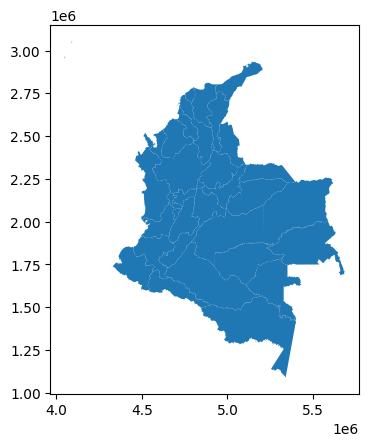

In [3]:
mapdepart=gpd.read_file(r'departamentos.zip')
mapdepart.plot()
mapdepart.crs
mapdepart
 

<AxesSubplot:>

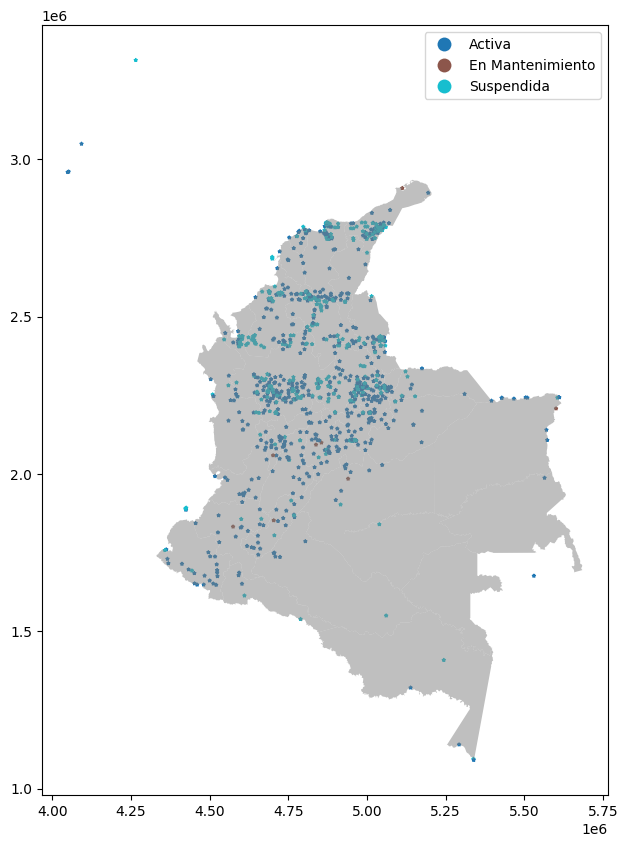

In [4]:
crs_elipsoidal = "EPSG:4326"
crs_cartesiano = "EPSG:9377"

estaciones_cartesiano = estaciones.to_crs(crs_cartesiano)
estaciones_cartesiano




axis = estaciones_cartesiano.plot('estado', figsize =[10,10], markersize = 5, legend = True, marker = '*')
mapdepart.plot(ax = axis, alpha = 0.5, color = 'grey')




MAPA ESTACIONES EN CUNDINAMARCA

<AxesSubplot:>

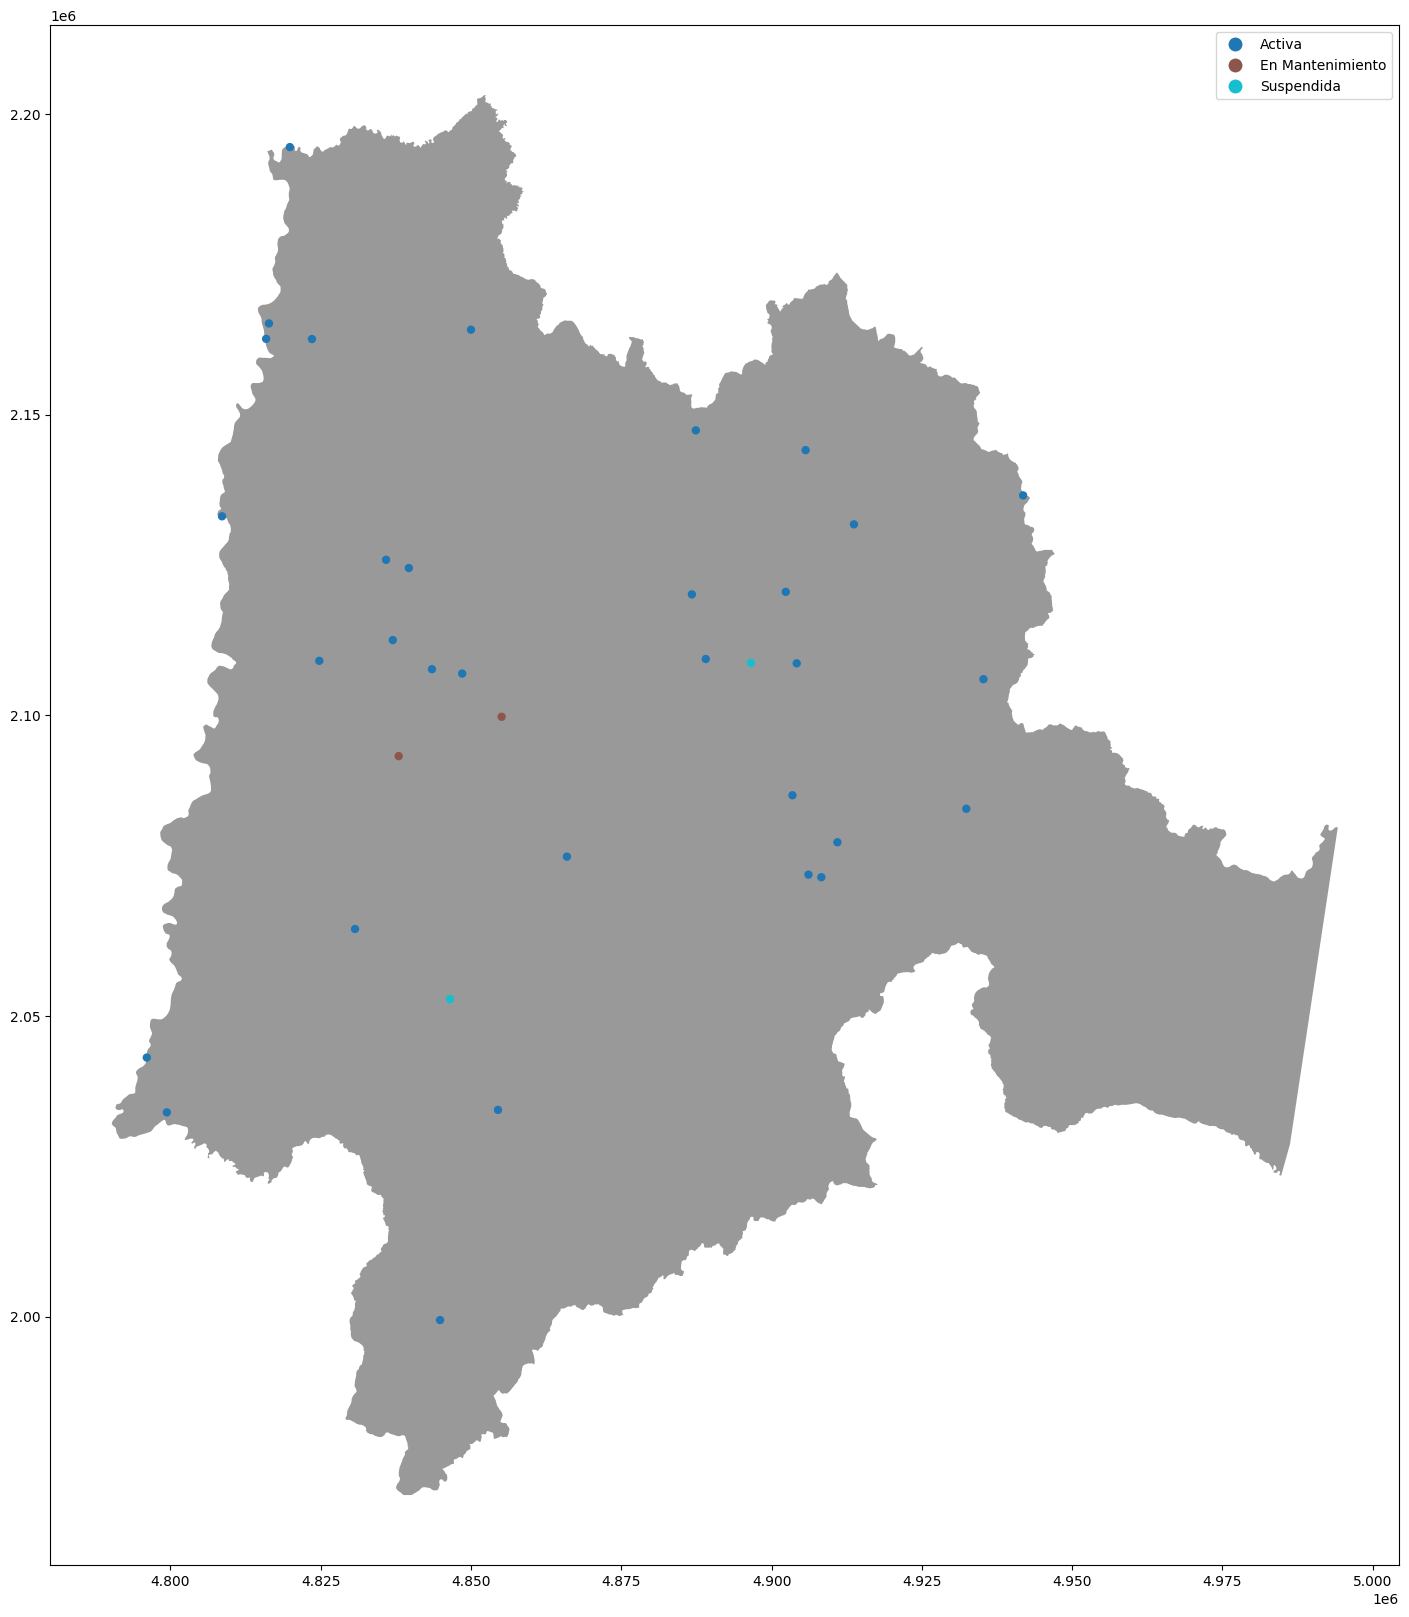

In [5]:
axis = mapdepart.query("DeNombre == 'Cundinamarca'").plot(alpha = 0.8, color = 'grey',figsize =[20,20])
estaciones_cartesiano.query("departamento == 'Cundinamarca'").plot('estado', ax = axis,legend = True, markersize = 25)

MUNICIPIOS MAPA DE COLOMBIA (ODJETIVO PORNERLO SOBRE EL MAPA DEPARTAMENTAL)

In [6]:
municipios = gpd.read_file(r'D:\usuario\Desktop\GEOPANDAS\COL_Municipio (1).zip')
municipios_coor = municipios.to_crs(crs_cartesiano)
municipios_coor.set_index('ID')

,TOTPOP_CY,Shape__Are,Shape__Len,cod_dane,geometry
ID,,,,,
05001,2559097,3.798647e+08,1.072579e+05,05001000,"POLYGON ((4705186.272 2262595.372, 4705237.155..."
05002,20493,5.155810e+08,1.282157e+05,05002000,"POLYGON ((4726933.831 2215584.465, 4727022.005..."
05004,2763,2.935562e+08,8.885140e+04,05004000,"POLYGON ((4659086.852 2305010.142, 4659119.631..."
05021,4746,1.294922e+08,7.572552e+04,05021000,"POLYGON ((4775369.455 2267368.504, 4775557.137..."
05030,31600,8.456353e+07,5.066772e+04,05030000,"POLYGON ((4702465.629 2231661.389, 4702534.094..."
...,...,...,...,...,...
97889,1108,4.669929e+09,4.292950e+05,97889000,"POLYGON ((5366959.304 1680871.136, 5366853.661..."
99001,20500,1.234376e+10,6.149489e+05,99001000,"POLYGON ((5576258.640 2259282.851, 5576513.371..."
99524,9705,1.844082e+10,8.362720e+05,99524000,"POLYGON ((5439247.474 2243995.808, 5439636.495..."


In [7]:
a = pd.read_csv(r'municipiosxd.csv')
mun_depart = pd.DataFrame({'codigo':a['CódigoMunicipio'].values,'departamento':a['NombreDepartamento'].values,'municipio':a['Nombre Municipio'].values})
mun_depart.set_index('codigo')

,departamento,municipio
codigo,,
5001,ANTIOQUIA,MEDELLÍN
5002,ANTIOQUIA,ABEJORRAL
5004,ANTIOQUIA,ABRIAQUÍ
5021,ANTIOQUIA,ALEJANDRÍA
5030,ANTIOQUIA,AMAGÁ
...,...,...
97889,VAUPÉS,YAVARATÉ
99001,VICHADA,PUERTO CARREÑO
99524,VICHADA,LA PRIMAVERA


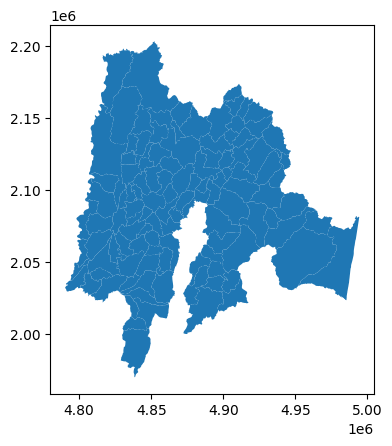

In [8]:
df1 = pd.merge(municipios_coor, mun_depart , left_index=True, right_index=True, how='left')
df1.set_index('ID')

a1 = df1.query("departamento == 'CUNDINAMARCA'").plot()





analizis de temperatura

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_18372\3608961299.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_filtrado_por_cod['fecha'] = pd.to_datetime(gdf_filtrado_por_cod['FechaObservacion']) #todo  los dias de enero


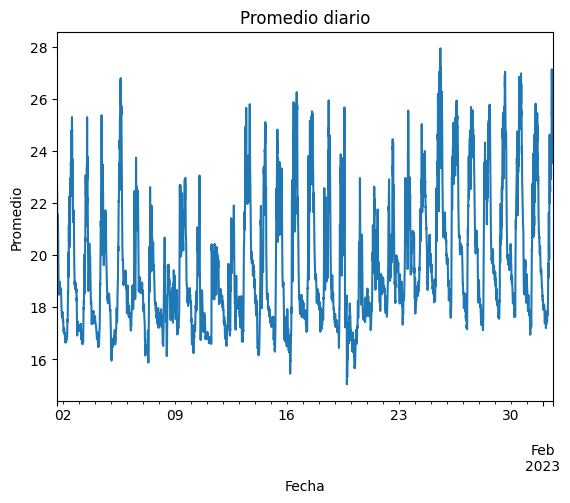

In [9]:
dato = pd.read_csv(r'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura (1).csv') #enero de 2023 todo EL PAIS


dtos_geo = gpd.GeoDataFrame(dato)
datos_cundinamarca = dtos_geo.query("Departamento == 'CUNDINAMARCA'") #===> datos de cundinamarca
datos_cundinamarca = gpd.GeoDataFrame(datos_cundinamarca)

datos_cundinamarca








# filtrado_por_estaciones
codigo_filtrado = 21205502  #  condigo estacion 
filtro = datos_cundinamarca['CodigoEstacion'] == codigo_filtrado
gdf_filtrado_por_cod= datos_cundinamarca[filtro]



gdf_filtrado_por_cod['fecha'] = pd.to_datetime(gdf_filtrado_por_cod['FechaObservacion']) #todo  los dias de enero 


#grafico de promedios

promedios= gdf_filtrado_por_cod.groupby('fecha')['ValorObservado'].mean()

datos_promedio_enero = pd.DataFrame({'Fecha': promedios.index, 'Promedio': promedios.values})
fig, ax = plt.subplots()
promedios.plot(x='Fecha', y='Promedio', ax=ax, kind='line')


plt.title("Promedio diario")
plt.xlabel('Fecha')
plt.ylabel('Promedio')

plt.show()









In [10]:
type(promedios)

pandas.core.series.Series

In [11]:
dtos_geo

,CodigoEstacion,CodigoSensor,FechaObservacion,ValorObservado,NombreEstacion,Departamento,Municipio,ZonaHidrografica,Latitud,Longitud,DescripcionSensor,UnidadMedida
0,16015502,68,01/01/2023 03:40:00 PM,24.41161,BLONAY - AUT,NORTE DE SANTANDER,CHINÁCOTA,CATATUMBO,7.564997,-72.621108,Temp Aire 2 m,°C
1,52055501,68,01/01/2023 03:40:00 PM,22.13530,OSPINA PEREZ - AUT,NARIÑO,CONSACÁ,PATÍA,1.254722,-77.487778,Temp Aire 2 m,°C
2,28045501,68,01/01/2023 03:40:00 PM,24.01007,PUEBLO BELLO - AUT,CESAR,PUEBLO BELLO,CESAR,10.421667,-73.574719,Temp Aire 2 m,°C
3,26125505,68,01/01/2023 03:40:00 PM,18.73239,LA BELLA - AUT,QUINDÍO,CALARCÁ,CAUCA,4.501111,-75.671389,Temp Aire 2 m,°C
4,54035501,68,01/01/2023 03:40:00 PM,19.42376,SANTIAGO GUTIERREZ - AUT,VALLE DEL CAUCA,ARGELIA,SAN JUÁN,4.726389,-76.114469,Temp Aire 2 m,°C
...,...,...,...,...,...,...,...,...,...,...,...,...
589401,26155503,68,02/01/2023 03:35:00 PM,28.39045,PLANALTO - AUT,CALDAS,MANIZALES,CAUCA,4.989722,-75.589719,Temp Aire 2 m,°C
589402,21165501,68,02/01/2023 03:35:00 PM,20.77114,DOLORES - AUT,TOLIMA,DOLORES,ALTO MAGDALENA,3.537156,-74.829828,Temp Aire 2 m,°C
589403,24015503,68,02/01/2023 03:35:00 PM,23.66990,CONFINES - AUT,SANTANDER,CONFINES,SOGAMOSO,6.373028,-73.207608,Temp Aire 2 m,°C
589404,52055502,68,02/01/2023 03:35:00 PM,19.96198,SANDONA - AUT,NARIÑO,SANDONÁ,PATÍA,1.300889,-77.460358,Temp Aire 2 m,°C


In [12]:
#filtro por dia
fecha_o = datetime(2023,1,1)
gdf_filtrado_por_cod_1_1_2023 = gdf_filtrado_por_cod[gdf_filtrado_por_cod['fecha'].dt.date == fecha_o.date()] #solo el primero de enero 
gdf_filtrado_por_cod_1_1_2023.sort_values('fecha')

,CodigoEstacion,CodigoSensor,FechaObservacion,ValorObservado,NombreEstacion,Departamento,Municipio,ZonaHidrografica,Latitud,Longitud,DescripcionSensor,UnidadMedida,fecha
10,21205502,68,01/01/2023 03:40:00 PM,22.90900,MISIONES - AUT,CUNDINAMARCA,EL COLEGIO,ALTO MAGDALENA,4.544997,-74.440556,Temp Aire 2 m,°C,2023-01-01 15:40:00
91,21205502,68,01/01/2023 03:45:00 PM,22.50201,MISIONES - AUT,CUNDINAMARCA,EL COLEGIO,ALTO MAGDALENA,4.544997,-74.440556,Temp Aire 2 m,°C,2023-01-01 15:45:00
137,21205502,68,01/01/2023 03:50:00 PM,22.14136,MISIONES - AUT,CUNDINAMARCA,EL COLEGIO,ALTO MAGDALENA,4.544997,-74.440556,Temp Aire 2 m,°C,2023-01-01 15:50:00
196,21205502,68,01/01/2023 03:55:00 PM,21.84025,MISIONES - AUT,CUNDINAMARCA,EL COLEGIO,ALTO MAGDALENA,4.544997,-74.440556,Temp Aire 2 m,°C,2023-01-01 15:55:00
206,21205502,68,01/01/2023 04:00:00 PM,21.52825,MISIONES - AUT,CUNDINAMARCA,EL COLEGIO,ALTO MAGDALENA,4.544997,-74.440556,Temp Aire 2 m,°C,2023-01-01 16:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5016,21205502,68,01/01/2023 11:35:00 PM,17.77837,MISIONES - AUT,CUNDINAMARCA,EL COLEGIO,ALTO MAGDALENA,4.544997,-74.440556,Temp Aire 2 m,°C,2023-01-01 23:35:00
5086,21205502,68,01/01/2023 11:40:00 PM,17.79664,MISIONES - AUT,CUNDINAMARCA,EL COLEGIO,ALTO MAGDALENA,4.544997,-74.440556,Temp Aire 2 m,°C,2023-01-01 23:40:00
5120,21205502,68,01/01/2023 11:45:00 PM,17.75456,MISIONES - AUT,CUNDINAMARCA,EL COLEGIO,ALTO MAGDALENA,4.544997,-74.440556,Temp Aire 2 m,°C,2023-01-01 23:45:00
5163,21205502,68,01/01/2023 11:50:00 PM,17.72991,MISIONES - AUT,CUNDINAMARCA,EL COLEGIO,ALTO MAGDALENA,4.544997,-74.440556,Temp Aire 2 m,°C,2023-01-01 23:50:00


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_18372\1330593771.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_filtrado_por_cod['fecha'] = pd.to_datetime(gdf_filtrado_por_cod['FechaObservacion']) #todo  los dias de enero


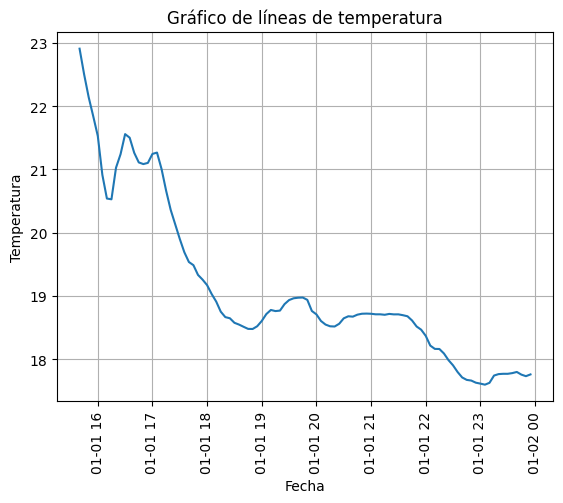

In [13]:
fecha_o = datetime(2023,1,1) #fecha

codigo_filtrado = 21205502  #  condigo estacion 
filtro = datos_cundinamarca['CodigoEstacion'] == codigo_filtrado #esto lo saque de datos hidrometeorologicos crudos
gdf_filtrado_por_cod= datos_cundinamarca[filtro]


gdf_filtrado_por_cod['fecha'] = pd.to_datetime(gdf_filtrado_por_cod['FechaObservacion']) #todo  los dias de enero 

gdf_filtrado_por_cod_1_1_2023 = gdf_filtrado_por_cod[gdf_filtrado_por_cod['fecha'].dt.date == fecha_o.date()] #solo el primero de enero 

gdf_filtrado_por_cod_1_1_2023.sort_values('fecha')
df_serie_temporal_para_dia__1_1_2023 =gdf_filtrado_por_cod_1_1_2023 #serie temporal ordenada por horas desde las 00 hasta las 23:55

df_serie_temporal_para_dia__1_1_2023 =df_serie_temporal_para_dia__1_1_2023[['fecha','ValorObservado']]
#df_serie_temporal_para_dia__1_1_2023



plt.plot(df_serie_temporal_para_dia__1_1_2023['fecha'], df_serie_temporal_para_dia__1_1_2023['ValorObservado'])
plt.xlabel('Fecha')
plt.ylabel('Temperatura')
plt.title('Gráfico de líneas de temperatura')
plt.xticks(rotation=90)
plt.grid()
plt.show()



In [14]:
fecha_o = datetime(2023,1,3)

codigo_filtrado = 21205502  #  condigo estacion 
filtro = datos_cundinamarca['CodigoEstacion'] == codigo_filtrado
gdf_filtrado_por_cod= datos_cundinamarca[filtro]


gdf_filtrado_por_cod['fecha'] = pd.to_datetime(gdf_filtrado_por_cod['FechaObservacion']) #todo  los dias de enero 

gdf_filtrado_por_cod_1_1_2023 = gdf_filtrado_por_cod[gdf_filtrado_por_cod['fecha'].dt.date == fecha_o.date()] #solo el primero de enero 

gdf_filtrado_por_cod_1_1_2023.sort_values('fecha')


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_18372\3158198159.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_filtrado_por_cod['fecha'] = pd.to_datetime(gdf_filtrado_por_cod['FechaObservacion']) #todo  los dias de enero


,CodigoEstacion,CodigoSensor,FechaObservacion,ValorObservado,NombreEstacion,Departamento,Municipio,ZonaHidrografica,Latitud,Longitud,DescripcionSensor,UnidadMedida,fecha
23511,21205502,68,01/03/2023 12:00:00 AM,17.08930,MISIONES - AUT,CUNDINAMARCA,EL COLEGIO,ALTO MAGDALENA,4.544997,-74.440556,Temp Aire 2 m,°C,2023-01-03 00:00:00
23541,21205502,68,01/03/2023 12:05:00 AM,17.09954,MISIONES - AUT,CUNDINAMARCA,EL COLEGIO,ALTO MAGDALENA,4.544997,-74.440556,Temp Aire 2 m,°C,2023-01-03 00:05:00
23633,21205502,68,01/03/2023 12:10:00 AM,17.08431,MISIONES - AUT,CUNDINAMARCA,EL COLEGIO,ALTO MAGDALENA,4.544997,-74.440556,Temp Aire 2 m,°C,2023-01-03 00:10:00
23646,21205502,68,01/03/2023 12:15:00 AM,17.12961,MISIONES - AUT,CUNDINAMARCA,EL COLEGIO,ALTO MAGDALENA,4.544997,-74.440556,Temp Aire 2 m,°C,2023-01-03 00:15:00
23722,21205502,68,01/03/2023 12:20:00 AM,17.22877,MISIONES - AUT,CUNDINAMARCA,EL COLEGIO,ALTO MAGDALENA,4.544997,-74.440556,Temp Aire 2 m,°C,2023-01-03 00:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41679,21205502,68,01/03/2023 11:35:00 PM,17.57335,MISIONES - AUT,CUNDINAMARCA,EL COLEGIO,ALTO MAGDALENA,4.544997,-74.440556,Temp Aire 2 m,°C,2023-01-03 23:35:00
41737,21205502,68,01/03/2023 11:40:00 PM,17.58717,MISIONES - AUT,CUNDINAMARCA,EL COLEGIO,ALTO MAGDALENA,4.544997,-74.440556,Temp Aire 2 m,°C,2023-01-03 23:40:00
41793,21205502,68,01/03/2023 11:45:00 PM,17.60833,MISIONES - AUT,CUNDINAMARCA,EL COLEGIO,ALTO MAGDALENA,4.544997,-74.440556,Temp Aire 2 m,°C,2023-01-03 23:45:00
41856,21205502,68,01/03/2023 11:50:00 PM,17.62844,MISIONES - AUT,CUNDINAMARCA,EL COLEGIO,ALTO MAGDALENA,4.544997,-74.440556,Temp Aire 2 m,°C,2023-01-03 23:50:00
